In [2]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import DataFrameReader
from pyspark.sql.functions import explode
import matplotlib
%matplotlib inline

In [3]:
def IntegerSafe(value): # In case there are non-integer type to be converted.
    try:
        return int(value)
    except ValueError:
        return None

sc = SparkContext.getOrCreate()
ss = SparkSession.builder.getOrCreate()



In [4]:
events_df = ss.read.csv('events.csv',header=True)

In [5]:
attributes_df = ss.read.csv('attributes.csv',header=True)

In [15]:
attributes_df.count()

185590093

In [64]:
events_df.count()

111946597

In [28]:
events_df.show(2)

+----------------+-------------------+-----+---------------+-----------+--------------------+
|          app_id|         session_id|event|event_timestamp|event_value|        user_id_hash|
+----------------+-------------------+-----+---------------+-----------+--------------------+
|4724682771660800|5558845121177764917|   45|  1542215397132|        0.0|9943447915df3a45f...|
|4724682771660800|5558845121177764917|   45|  1542215484895|        0.0|9943447915df3a45f...|
+----------------+-------------------+-----+---------------+-----------+--------------------+
only showing top 2 rows



## Count Distributions

### Events

In [39]:
count_session = events_df.groupBy('session_id').count().orderBy('count',ascending=False)
count_session.show()

+-------------------+-----+
|         session_id|count|
+-------------------+-----+
|7426702773020538130| 1224|
|8880464780721706820| 1201|
|7084000948037095408| 1154|
| 143511393374754792| 1054|
|4109318513504549774| 1041|
|8062388864346499278| 1009|
|5564421332310921213| 1001|
|6493366237596949308|  989|
|7631880841238664989|  983|
|2740288949953856193|  976|
|3499571212335610101|  971|
|7078157869247215962|  950|
|4937694171433226210|  941|
|5479495416433961494|  929|
|9112569384951157139|  915|
|4480266659460139677|  895|
|7579848554140261775|  893|
|7582782377331146062|  887|
|8419027869145663530|  884|
|3910033840738918534|  876|
+-------------------+-----+
only showing top 20 rows



In [46]:
mvv_array = [int(row['count']) for row in count_session.selectExpr('count').collect()]


In [1]:
matplotlib.pyplot.hist(mvv_array,density=True,bins=range(0,200,5))

NameError: name 'matplotlib' is not defined

In [51]:
event_count = events_df.groupBy('event').count().orderBy('count',ascending=False)
event_count.show()

+------------------+--------+
|             event|   count|
+------------------+--------+
|                45|75493931|
|                 1| 5363926|
|                 5| 4887922|
|                 6| 4068474|
|                14| 3491117|
|                 4| 3435363|
|                40| 2775997|
|                 7| 1970903|
|                41| 1969223|
|                 3| 1828494|
|                42| 1598212|
|.a5027911885258752|  618037|
|.a5400102822346752|  604699|
|                44|  495590|
|.a5516611293544448|  411053|
|                 0|  407118|
|                63|  347198|
|                47|  310038|
|                57|  271268|
|                 8|  265034|
+------------------+--------+
only showing top 20 rows



In [52]:
mvv_array = [int(row['count']) for row in event_count.selectExpr('count').collect()]


(array([0.01518519, 0.00333333, 0.        , 0.        , 0.        ,
        0.        , 0.00037037, 0.        , 0.        , 0.00074074,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00037037, 0.        , 0.        , 0.        ]),
 array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
         550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
        1100, 1150, 1200, 1250]),
 <a list of 25 Patch objects>)

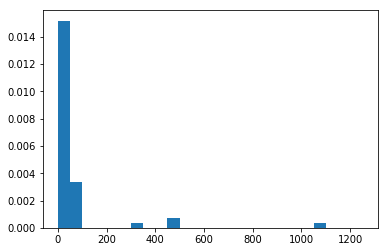

In [53]:
matplotlib.pyplot.hist(mvv_array,density=True,bins=range(0,1300,50))

In [54]:
event_count = events_df.groupBy('event_timestamp').count().orderBy('count',ascending=False)
event_count.show()

+---------------+-----+
|event_timestamp|count|
+---------------+-----+
|  1542052901883|   70|
|  1543586871549|   55|
|  1540691484428|   55|
|  1538681993290|   48|
|  1540029050168|   45|
|  1541910905267|   36|
|  1543322424942|   33|
|  1541796138036|   32|
|  1540690091455|   31|
|  1544406229187|   30|
|  1543371133492|   29|
|  1538753789374|   27|
|  1539496172730|   27|
|  1544596294319|   27|
|  1539716502514|   27|
|  1541112838898|   27|
|  1542823483768|   26|
|  1541318991162|   24|
|  1541021479880|   24|
|  1544527117129|   23|
+---------------+-----+
only showing top 20 rows



In [55]:
timestamp_array = [int(row['count']) for row in count_session.selectExpr('count').collect()]


(array([4.06512985e-02, 1.69785852e-02, 1.44032094e-02, 9.49286162e-03,
        6.74532602e-03, 4.27164568e-03, 2.70980247e-03, 1.80268697e-03,
        1.06172927e-03, 5.79101411e-04, 3.88295049e-04, 2.56529221e-04,
        1.82523482e-04, 1.34726858e-04, 1.01855425e-04, 8.00278337e-05,
        6.31619677e-05, 5.08776953e-05, 4.57559139e-05]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190]),
 <a list of 19 Patch objects>)

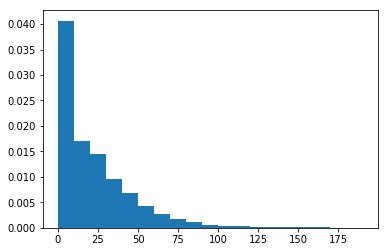

In [59]:
matplotlib.pyplot.hist(timestamp_array,density=True,bins=range(0,200,10))

### Attributes

In [27]:
attributes_df.show(2)

+----------------+-------------------+---------+---------------+--------------------+
|          app_id|         session_id|attribute|attribute_value|        user_id_hash|
+----------------+-------------------+---------+---------------+--------------------+
|4724682771660800|2201961907282901522|        0|              1|9943447915df3a45f...|
|4724682771660800|2201961907282901522|        1|              1|9943447915df3a45f...|
+----------------+-------------------+---------+---------------+--------------------+
only showing top 2 rows



In [61]:
attribute_count = attributes_df.groupBy('attribute').count().orderBy('count',ascending=False)
attribute_count.show()

+---------+-------+
|attribute|  count|
+---------+-------+
|       14|6776351|
|        4|6776351|
|       13|6776351|
|       20|6776351|
|        5|6776351|
|        7|6776351|
|        3|6776351|
|       11|6776351|
|       10|6776351|
|        0|6776351|
|       15|6776351|
|       18|6776351|
|       19|6776351|
|       16|6776351|
|       17|6776351|
|        6|6776351|
|       52|6776351|
|        8|6776351|
|        1|6776351|
|        9|6776351|
+---------+-------+
only showing top 20 rows



In [62]:
attribute_array = [int(row['count']) for row in attribute_count.selectExpr('count').collect()]


(array([4.06512985e-02, 1.69785852e-02, 1.44032094e-02, 9.49286162e-03,
        6.74532602e-03, 4.27164568e-03, 2.70980247e-03, 1.80268697e-03,
        1.06172927e-03, 5.79101411e-04, 3.88295049e-04, 2.56529221e-04,
        1.82523482e-04, 1.34726858e-04, 1.01855425e-04, 8.00278337e-05,
        6.31619677e-05, 5.08776953e-05, 4.57559139e-05]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190]),
 <a list of 19 Patch objects>)

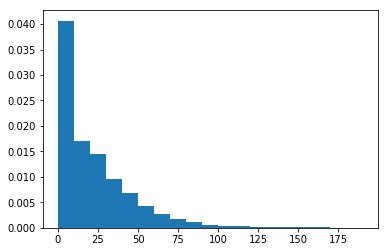

In [63]:
matplotlib.pyplot.hist(timestamp_array,density=True,bins=range(0,200,10))

In [65]:
attribute_value_count = attributes_df.groupBy('attribute_value').count().orderBy('count',ascending=False)


+---------+-------+
|attribute|  count|
+---------+-------+
|       14|6776351|
|        4|6776351|
|       13|6776351|
|       10|6776351|
|        9|6776351|
|       15|6776351|
|       11|6776351|
|       16|6776351|
|        1|6776351|
|       20|6776351|
|        8|6776351|
|       18|6776351|
|        7|6776351|
|       17|6776351|
|        5|6776351|
|       19|6776351|
|        6|6776351|
|       52|6776351|
|        3|6776351|
|        0|6776351|
+---------+-------+
only showing top 20 rows



In [ ]:
attribute_value_count.show()

In [66]:
attribute_value_array = [int(row['count']) for row in attribute_value_count.selectExpr('count').collect()]


(array([0.00000000e+00, 5.01153489e-01, 2.59540064e-01, 1.09321034e-01,
        4.96243695e-02, 2.47618647e-02, 1.37600322e-02, 8.49578584e-03,
        5.83435540e-03, 4.16328896e-03, 3.29457772e-03, 2.71672714e-03,
        2.24670515e-03, 1.91160711e-03, 1.63567655e-03, 1.46812753e-03,
        1.33652137e-03, 1.18832620e-03, 1.03626026e-03, 9.56080039e-04,
        8.52675199e-04, 7.49270360e-04, 6.88996951e-04, 5.97757387e-04,
        5.40248813e-04, 5.08176724e-04, 4.45691447e-04, 4.21360896e-04,
        7.50929261e-04]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

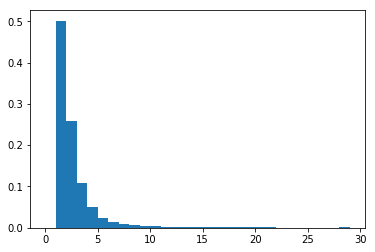

In [69]:
matplotlib.pyplot.hist(attribute_value_array,density=True,bins=range(0,30,1))